In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Статистика по игрокам за 1946 - 2023 годы </h1>

<h3>1.1 Считывание и очистка данных</h3>

In [99]:
player = pd.read_csv(r'C:\Users\User\PycharmProjects\курсач исходники\common_player_info.csv')
player.head(20)

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,...,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N
5,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,HISTADD_frosty_able,1956.0,1956.0,N,Y,Y,1956,NaN,NaN,N
6,76007,John,Abramovic,John Abramovic,"Abramovic, John",J. Abramovic,john-abramovic,1919-02-09 00:00:00,Salem,USA,...,HISTADD_brooms_abramovic,1946.0,1947.0,N,Y,Y,Undrafted,Undrafted,Undrafted,N
7,203518,Alex,Abrines,Alex Abrines,"Abrines, Alex",A. Abrines,alex-abrines,1993-08-01 00:00:00,FC Barcelona,Spain,...,alex_abrines,2016.0,2018.0,N,Y,Y,2013,2,32,N
8,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,...,precious_achiuwa,2020.0,2023.0,N,Y,Y,2020,1,20,N
9,101165,Alex,Acker,Alex Acker,"Acker, Alex",A. Acker,alex-acker,1983-01-21 00:00:00,Pepperdine,USA,...,alex_acker,2005.0,2008.0,Y,Y,Y,2005,2,60,N


In [100]:
del player['display_first_last']
del player['display_last_comma_first']
del player['display_fi_last']
del player['player_slug']
del player['last_affiliation']
del player['rosterstatus']
del player['games_played_current_season_flag']
del player['team_id']
del player['team_abbreviation']
del player['team_code']
del player['playercode']
del player['dleague_flag']
del player['nba_flag']
del player['games_played_flag']
del player['draft_year']
del player['draft_round']
del player['draft_number']
player = player.dropna()
player.head(10)

,person_id,first_name,last_name,birthdate,school,country,height,weight,season_exp,jersey,position,team_name,team_city,from_year,to_year,greatest_75_flag
0,76001,Alaa,Abdelnaby,1968-06-24 00:00:00,Duke,USA,6-10,240.0,5.0,30,Forward,Trail Blazers,Portland,1990.0,1994.0,N
1,76003,Kareem,Abdul-Jabbar,1947-04-16 00:00:00,UCLA,USA,7-2,225.0,20.0,33,Center,Lakers,Los Angeles,1969.0,1988.0,Y
2,1505,Tariq,Abdul-Wahad,1974-11-03 00:00:00,San Jose State,France,6-6,235.0,7.0,9,Forward-Guard,Kings,Sacramento,1997.0,2003.0,N
3,949,Shareef,Abdur-Rahim,1976-12-11 00:00:00,California,USA,6-9,245.0,13.0,3,Forward,Grizzlies,Vancouver,1996.0,2007.0,N
4,76005,Tom,Abernethy,1954-05-06 00:00:00,Indiana,USA,6-7,220.0,5.0,5,Forward,Warriors,Golden State,1976.0,1980.0,N
5,76006,Forest,Able,1932-07-27 00:00:00,Western Kentucky,USA,6-3,180.0,1.0,6,Guard,Nationals,Syracuse,1956.0,1956.0,N
8,1630173,Precious,Achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,6-8,225.0,3.0,5,Forward,Raptors,Toronto,2020.0,2023.0,N
9,101165,Alex,Acker,1983-01-21 00:00:00,Pepperdine,USA,6-5,185.0,3.0,3,Guard,Clippers,Los Angeles,2005.0,2008.0,N
11,76009,Mark,Acres,1962-11-15 00:00:00,Oral Roberts,USA,6-11,220.0,6.0,42,Center,Magic,Orlando,1987.0,1992.0,N
12,76010,Charles,Acton,1942-01-11 00:00:00,Hillsdale,USA,6-6,210.0,1.0,24,Forward,Rockets,San Diego,1967.0,1967.0,N


In [101]:
def height_sm(h):
    h = h.astype(str)
    foot, inch = h.str.split('-', expand=True).astype(int).T.values
    sm = foot * 30.48 + inch * 2.54
    return sm
player['height'] = height_sm(player['height'])

<h3>1.2 Зависимость балла в личном зачёте от физических данных </h3>

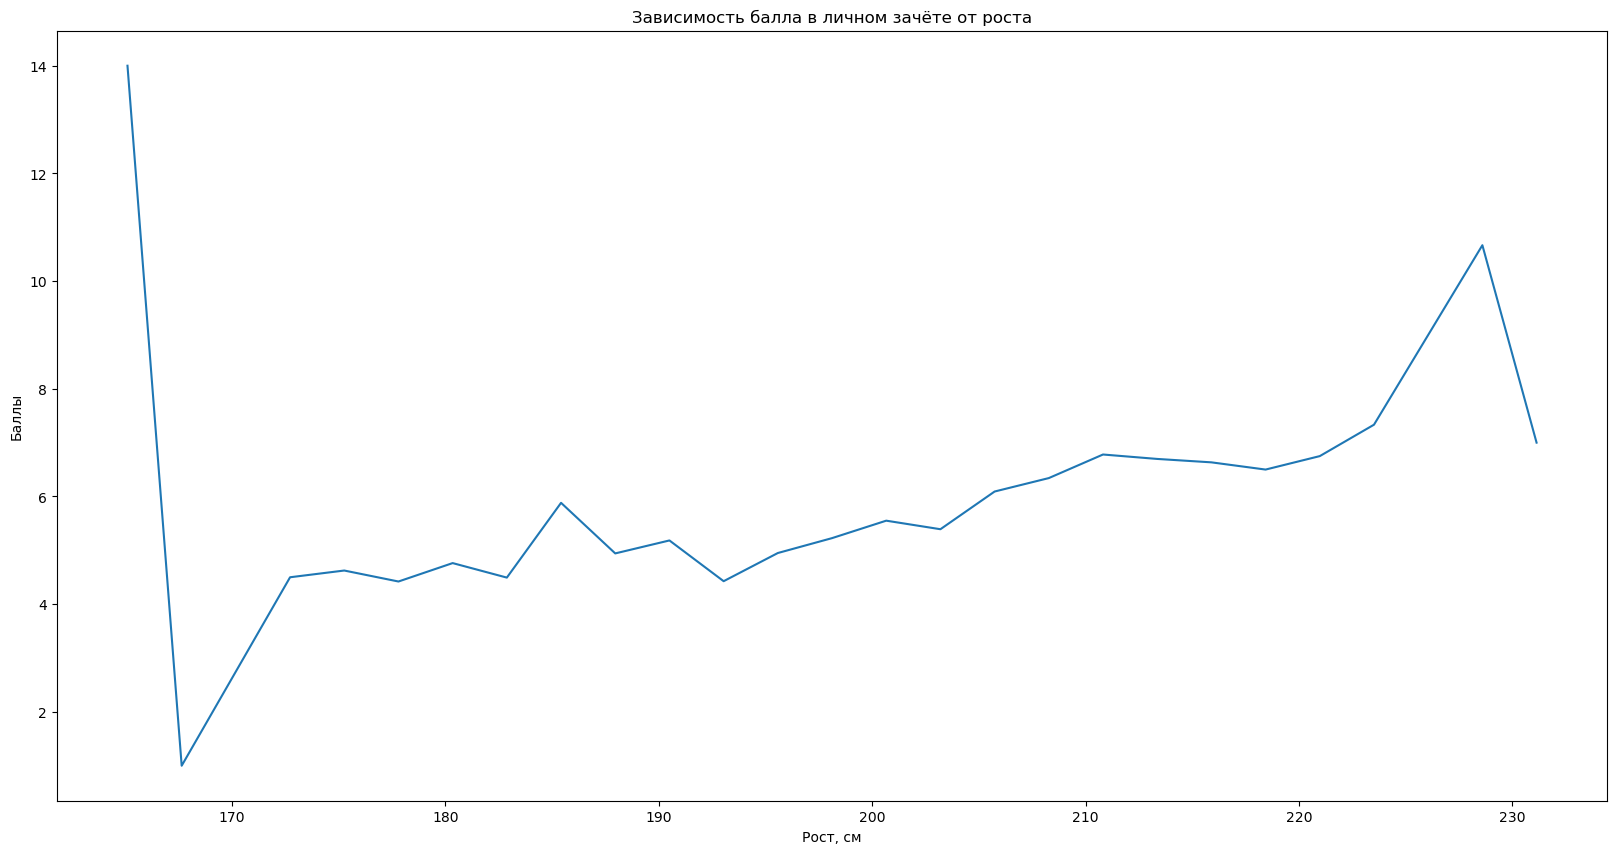

In [83]:
plt.figure(figsize=(20, 10))
plt.plot(player.groupby('height')['season_exp'].mean())
plt.title('Зависимость балла в личном зачёте от роста')
plt.xlabel('Рост, см')
plt.ylabel('Баллы')
plt.show()

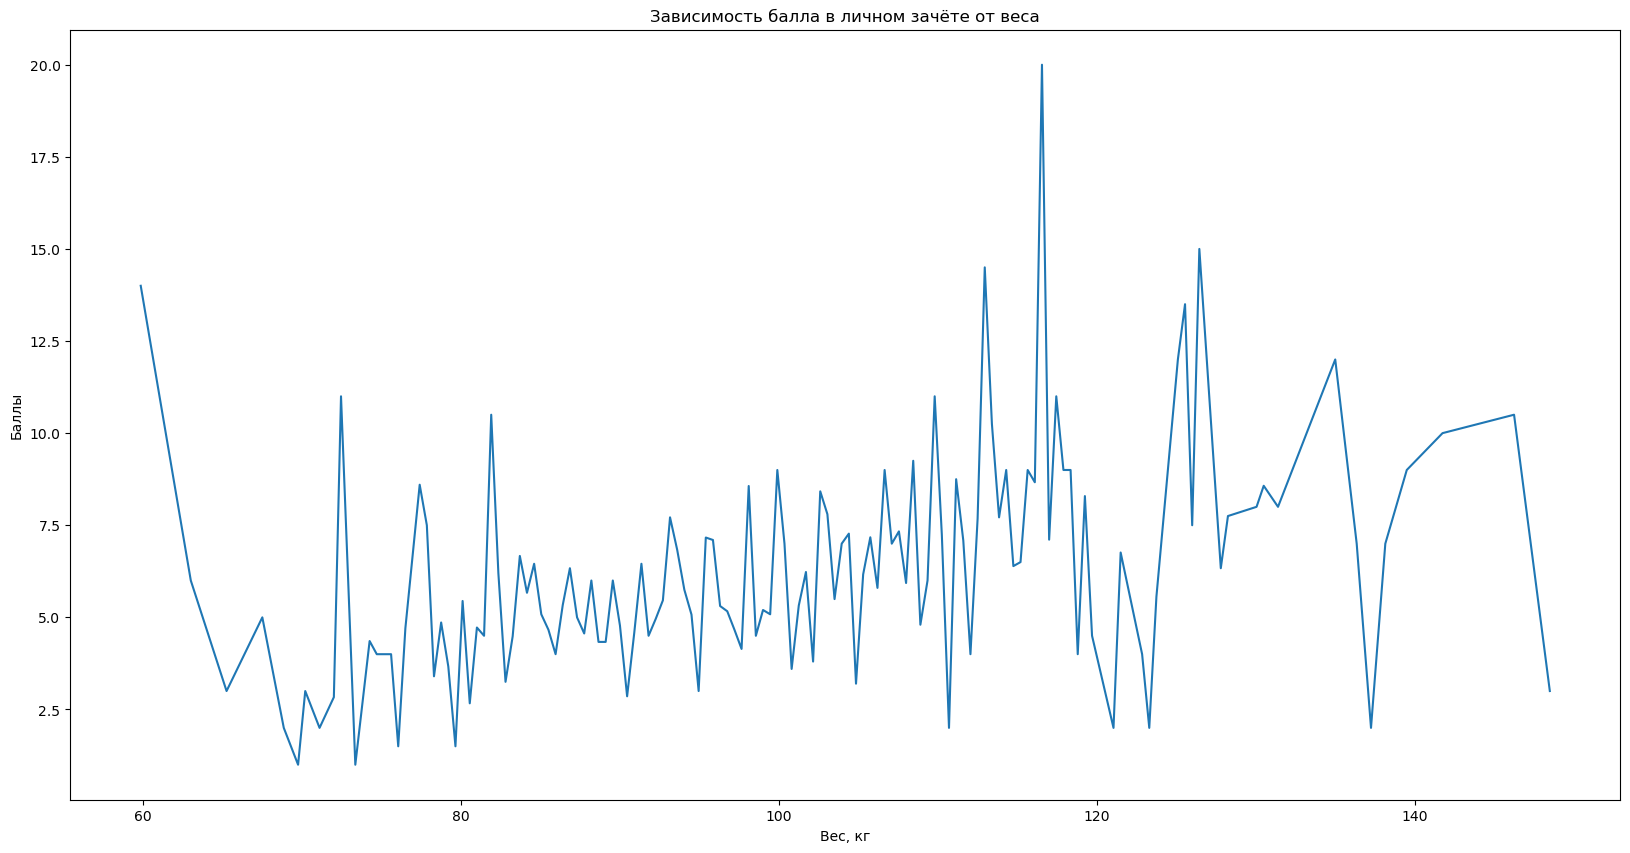

In [84]:
player['weight'] = player['weight'] * 4.5 / 10

plt.figure(figsize=(20, 10))
plt.plot(player.groupby('weight')['season_exp'].mean())
plt.title('Зависимость балла в личном зачёте от веса')
plt.xlabel('Вес, кг')
plt.ylabel('Баллы')
plt.show()

для более точного анализа второй зависимости вычислена корреляция спирмена: 0,19605734

выводы:
1. положительная корреляция между баллом в личном зачёте и ростом
2. практически отсутствие корреляции между баллом в личном зачёте и весом

<h3>1.3 Анализ длительности карьеры </h3>

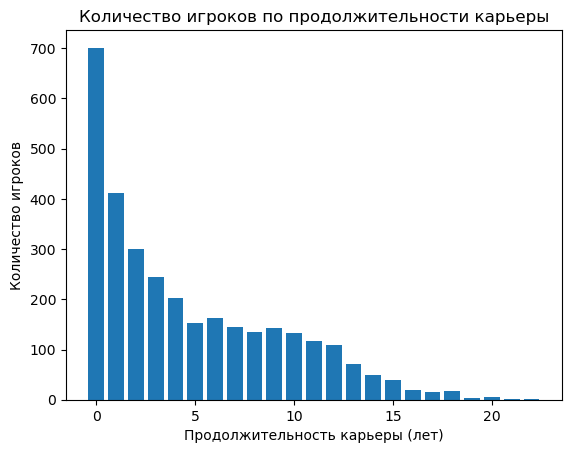

In [85]:
player['career_long'] = player['to_year'] - player['from_year']
career_counts = player['career_long'].value_counts()
plt.bar(career_counts.index, career_counts.values)
plt.title('Количество игроков по продолжительности карьеры')
plt.xlabel('Продолжительность карьеры (лет)')
plt.ylabel('Количество игроков')
plt.show()

Выводы:
1. Более чем у 22% игроков карьера заканчивается меньше, чем за год
2. Карьера ещё 36,5% игроков заканчивается в период от 1 до 4 лет
3. Ещё 34,4% игроков с примерно равной вероятностью заканчивают карьеру в период от 5 до 12 лет
4. У 7% игроков длительность карьеры превышает 12 лет
5. Всего у двух игроков длительность карьеры составила больше 20 лет 

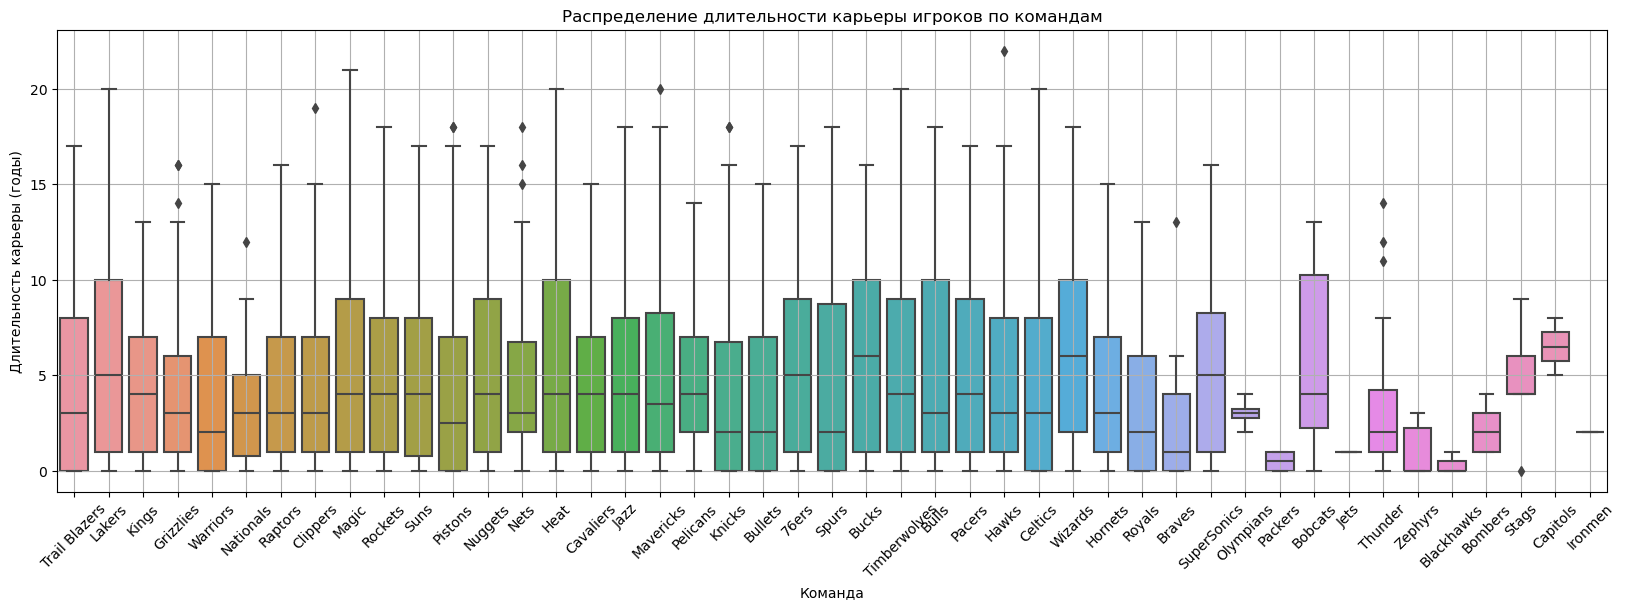

In [86]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='team_name', y='career_long', data=player)

plt.title('Распределение длительности карьеры игроков по командам')
plt.xlabel('Команда')
plt.ylabel('Длительность карьеры (годы)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Выводы:
1. В командах Jets и Ironmen практически отсутствуют данные
2. 50% значений в большинстве команд не превышают 5 лет
3. Вероятность карьеры, превышающей год, велика в 31 команде из 43
4. Вероятность карьеры, превышающей 10 лет, достигает 25% только в 6 командах - Lakers, Heats, Bucks, Bulls, Wizards, Bobcats
5. В командах SuperSonics, Bombers и Stags минимальный срок карьеры превышает один год 
6. Все игроки команды Capitols выступали за свою команду от 5 лет и больше

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


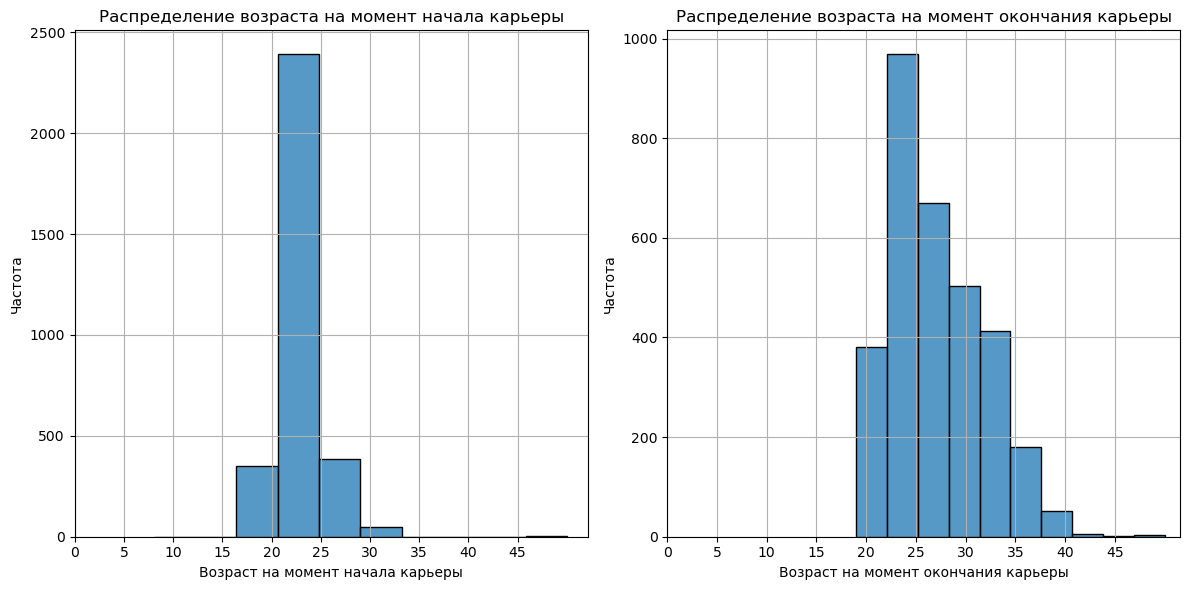

In [87]:
player['birthdate'] = pd.to_datetime(player['birthdate'])

player['age_at_start'] = player['from_year'] - player['birthdate'].dt.year
player['age_at_end'] = player['to_year'] - player['birthdate'].dt.year

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(player['age_at_start'], bins=10, kde=False)
plt.title('Распределение возраста на момент начала карьеры')
plt.xticks(range(0, 50, 5)) 
plt.xlabel('Возраст на момент начала карьеры')
plt.ylabel('Частота')
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(player['age_at_end'], bins=10, kde=False)
plt.xticks(range(0, 50, 5)) 
plt.title('Распределение возраста на момент окончания карьеры')
plt.xlabel('Возраст на момент окончания карьеры')
plt.ylabel('Частота')
plt.grid()

plt.tight_layout()
plt.show()

In [88]:
index_to_drop = player[player['age_at_start'] < 10].index
player = player.drop(index_to_drop)
display(player['age_at_start'].min())

index_to_drop = player[player['age_at_start'] > 35].index
player = player.drop(index_to_drop)
display(player['age_at_start'].max())

18.0

33.0

In [89]:
display(player['age_at_end'].min())

index_to_drop = player[player['age_at_end'] >= 50].index
player = player.drop(index_to_drop)
display(player['age_at_end'].max())

19.0

44.0

In [90]:
display(player[player['age_at_end'] <= 22].shape[0])
display(player[player['age_at_end'] >= 35].shape[0])

380

239

Выводы:
1. Большинство игроков (более 2300) начали свою карьеру в возрасте между 20 и 25 годами
2. Возраст самого раннего начала карьеры - 18 лет
3. Возраст самого позднего начала карьеры - 33 лет

Выводы:
1. Большинство игроков (чуть менее 1000) закончили свою карьеру в возрасте от 23 до 25 лет
2. Самое раннее окончание карьеры - 19 лет
3. Самое позднее окончание карьеры - 44 года
4. До 22 лет карьеру закончили игроков 12% игроков
5. После 35 лет карьеру закончили 8% игроков (причём у всех из них была долгая карьера)

<h3>1.4 Анализ происхождения игроков </h3>

In [91]:
total_players = player.groupby('team_name').size()
non_usa = player[player['country'] != 'USA'].groupby('team_name').size()
percent_non_usa = (non_usa / total_players) * 100
percent_df = percent_non_usa.reset_index(name='percent_non_usa')
percent_df

,team_name,percent_non_usa
0,76ers,6.722689
1,Blackhawks,NaN
2,Bobcats,7.142857
3,Bombers,NaN
4,Braves,NaN
5,Bucks,14.444444
6,Bullets,1.333333
7,Bulls,11.000000
8,Capitols,NaN
9,Cavaliers,9.708738


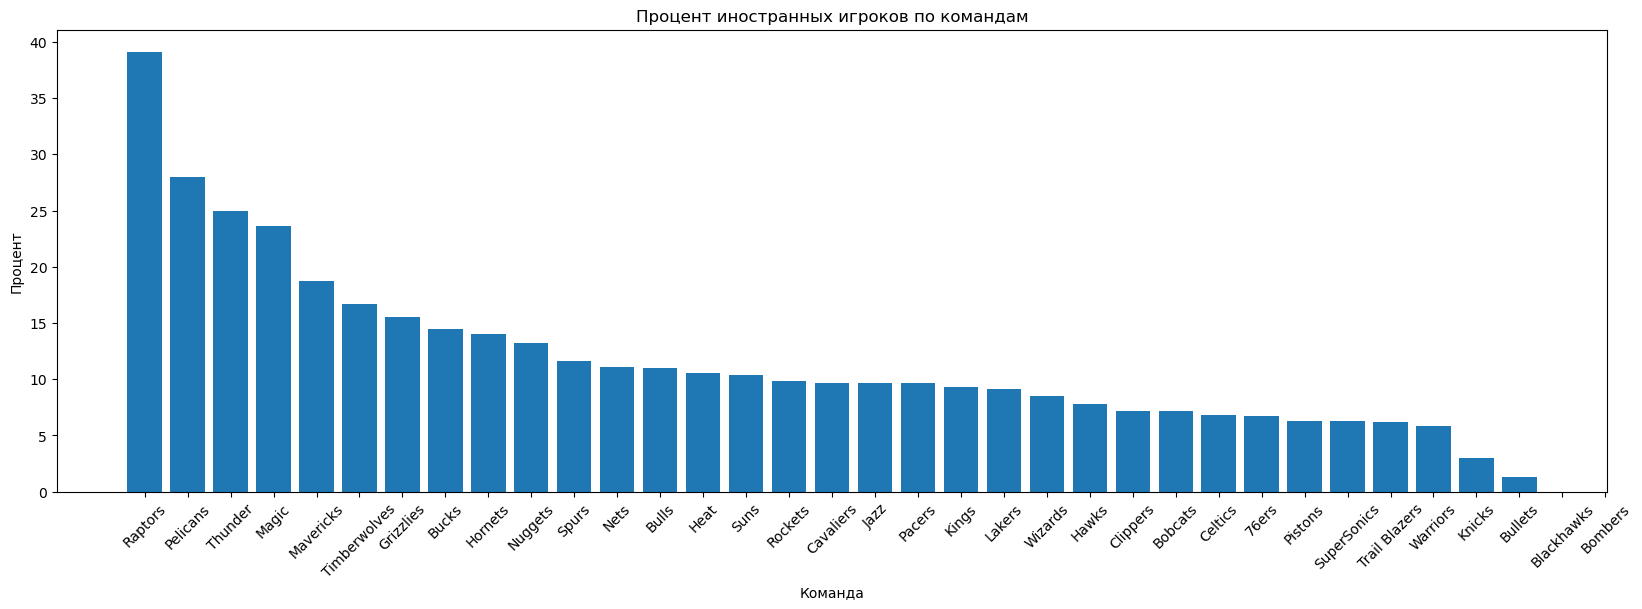

In [92]:
percent_df_sorted = percent_df.sort_values(by='percent_non_usa', ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(percent_df_sorted['team_name'], percent_df_sorted['percent_non_usa'])
plt.title('Процент иностранных игроков по командам')
plt.xlabel('Команда')
plt.ylabel('Процент')
plt.xticks(rotation=45)
plt.show()

65

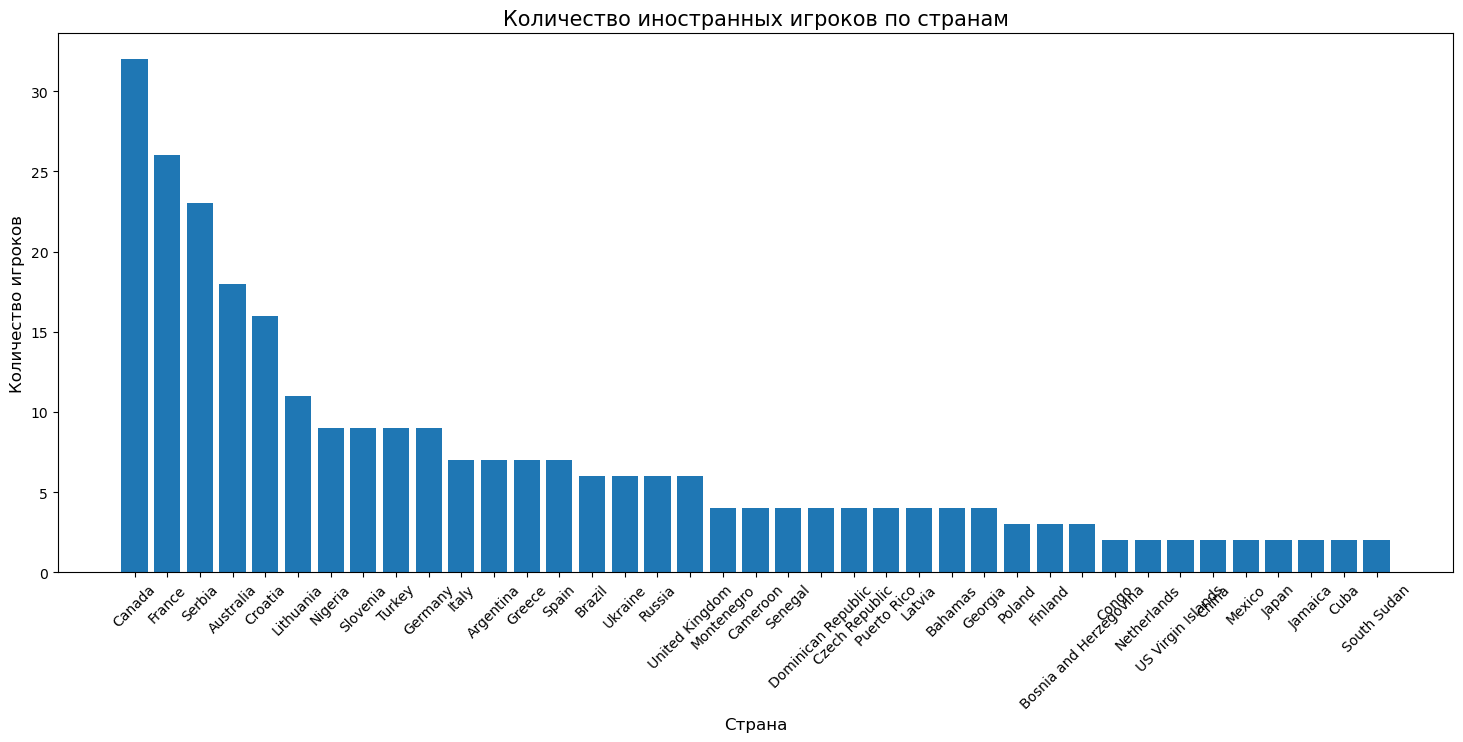

In [94]:
non_usa_players = player[player['country'] != 'USA']
country_counts = non_usa_players['country'].value_counts()
display(country_counts.shape[0])

country_counts = country_counts[country_counts >= 2]

plt.figure(figsize=(18, 7))
plt.bar(country_counts.index, country_counts.values)
plt.title('Количество иностранных игроков по странам', fontsize=15)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество игроков', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Выводы:
1. В 27% команд никогда не было иностранных игроков 
2. Максимальное количество игроков не американского происхождения (практически 40% от общего числа) в команде Raptors, что может быть связано с геополитическим положением региона, в котором она зарегистрирована (Торонто - крупнейший город Канады)
3. В среднем в командах около 12% иностранных игроков 
4. Большинство иностранных игроков из Канады, Франции и Сербии
5. Всего в нба играли представители 66 стран

<h3>1.5 Изучение динамики физических данных игроков во времени </h3>

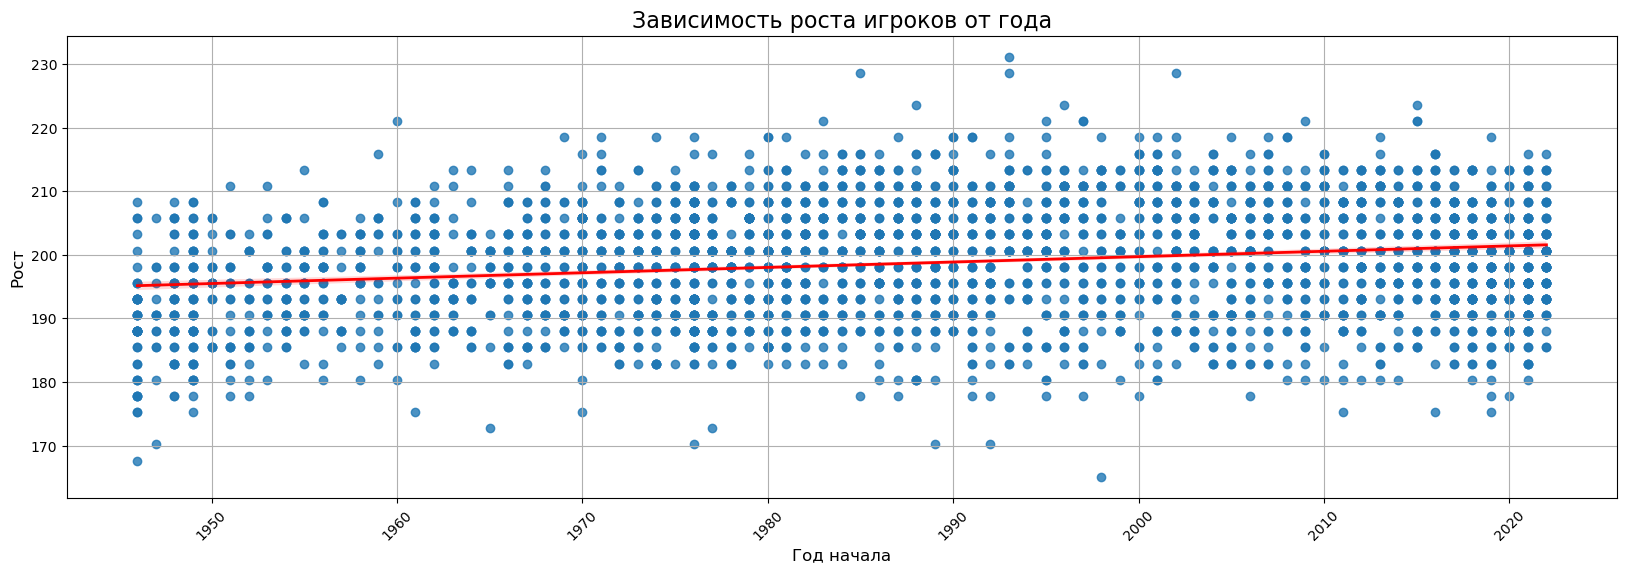

In [127]:
plt.figure(figsize=(20, 6))
sns.regplot(x='from_year', y='height', data=player, scatter=True, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Зависимость роста игроков от года', fontsize=16)
plt.xlabel('Год начала', fontsize=12)
plt.ylabel('Рост', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

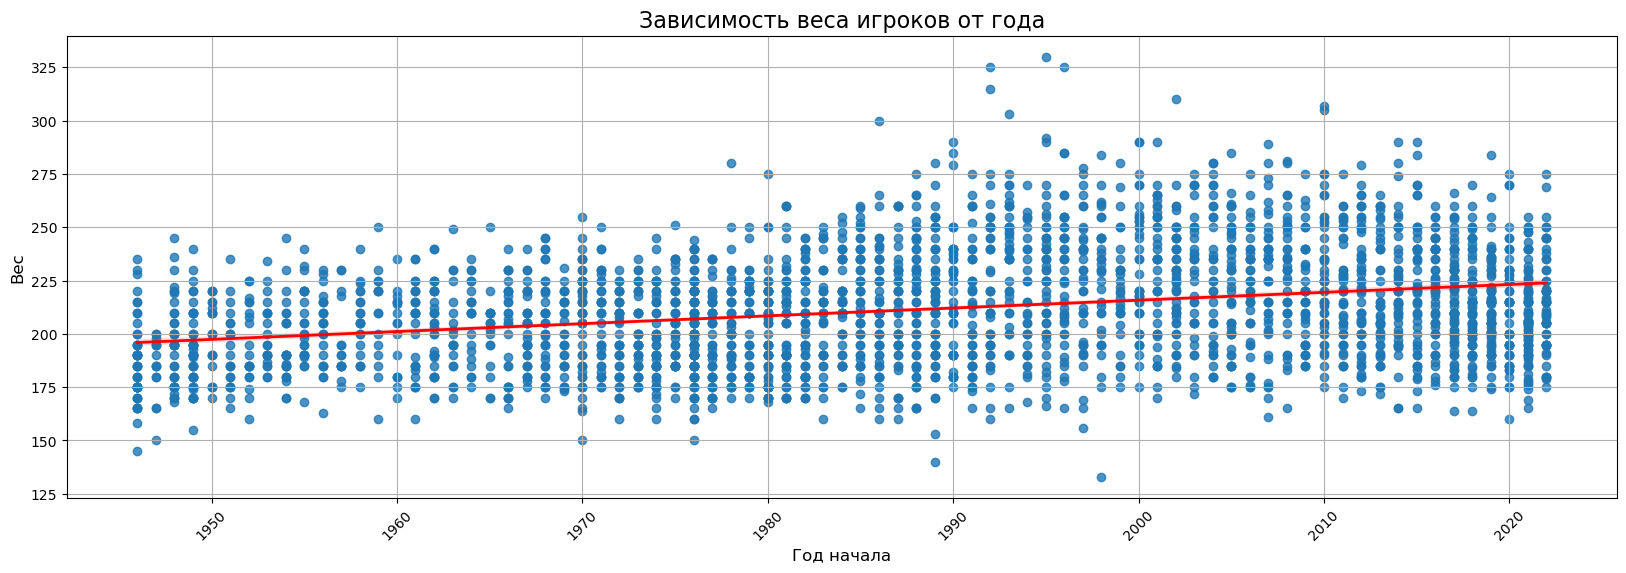

In [128]:
plt.figure(figsize=(20, 6))
sns.regplot(x='from_year', y='weight', data=player, scatter=True, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Зависимость веса игроков от года', fontsize=16)
plt.xlabel('Год начала', fontsize=12)
plt.ylabel('Вес', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

Вывод:
1. Наблюдается тенденция увеличения среднего роста и веса игроков со временем, причём вес увеличивается быстрее, чем рост, в пропорции примерно 2:1

<h3>1.6 Анализ позиций игроков </h3>

In [131]:
player['position'] = player['position'].replace({
    'Guard-Forward': 'Forward-Guard',
    'Forward-Center': 'Center-Forward'
})
player['position'].value_counts()

position
Guard             1206
Forward           1202
Center             454
Center-Forward     160
Forward-Guard      155
Name: count, dtype: int64

Выводы:
1. Количество форвардов и защитников приблизительно равно, в то время как количество центровых в 3 раза меньше
2. Около 10% игроков выполняют/способны играть в нескольки позициях 

In [205]:
average_height_by_team = player.groupby('team_name')['height'].mean().reset_index()
average_height_by_team.columns = ['team_name', 'average_height']

65679 строк 

<h1>Статистика по матчам </h1>

<h3>2.1 Считывание и очистка данных </h3>

In [234]:
game = pd.read_csv(r'C:\Users\User\PycharmProjects\курсач исходники\game.csv')
del game['season_id']
del game['team_id_home']
del game['game_id']
del game['matchup_home']
del game['min']
del game['fga_home']
del game['fg_pct_home']
del game['fg3m_home']
del game['fg3a_home']
del game['fg3_pct_home']
del game['fta_home']
del game['ft_pct_home']
del game['oreb_home']
del game['dreb_home']
del game['reb_home']
del game['ast_home']
del game['stl_home']
del game['blk_home']
del game['tov_home']
del game['pf_home']
del game['video_available_home']
del game['team_id_away']
del game['matchup_away']
del game['wl_away']
del game['fga_away']
del game['fg_pct_away']
del game['fg3m_away']
del game['fg3a_away']
del game['fg3_pct_away']
del game['fta_away']
del game['ft_pct_away']
del game['oreb_away']
del game['dreb_away']
del game['reb_away']
del game['ast_away']
del game['stl_away']
del game['blk_away']
del game['tov_away']
del game['pf_away']
del game['video_available_away']
del game['season_type']
game = game.dropna()
game.head(20)

,team_abbreviation_home,team_name_home,game_date,wl_home,fgm_home,ftm_home,pts_home,plus_minus_home,team_abbreviation_away,team_name_away,fgm_away,ftm_away,pts_away,plus_minus_away
0,HUS,Toronto Huskies,1946-11-01 00:00:00,L,25.0,16.0,66.0,-2,NYK,New York Knicks,24.0,20.0,68.0,2
1,BOM,St. Louis Bombers,1946-11-02 00:00:00,W,20.0,16.0,56.0,5,PIT,Pittsburgh Ironmen,16.0,19.0,51.0,-5
2,PRO,Providence Steamrollers,1946-11-02 00:00:00,W,21.0,17.0,59.0,6,BOS,Boston Celtics,21.0,11.0,53.0,-6
3,CHS,Chicago Stags,1946-11-02 00:00:00,W,21.0,21.0,63.0,16,NYK,New York Knicks,16.0,15.0,47.0,-16
4,DEF,Detroit Falcons,1946-11-02 00:00:00,L,10.0,13.0,33.0,-17,WAS,Washington Capitols,18.0,14.0,50.0,17
5,CLR,Cleveland Rebels,1946-11-03 00:00:00,W,24.0,23.0,71.0,11,HUS,Toronto Huskies,21.0,18.0,60.0,-11
6,PIT,Pittsburgh Ironmen,1946-11-04 00:00:00,L,19.0,18.0,56.0,-15,WAS,Washington Capitols,22.0,27.0,71.0,15
7,BOS,Boston Celtics,1946-11-05 00:00:00,L,23.0,9.0,55.0,-2,CHS,Chicago Stags,24.0,9.0,57.0,2
8,DEF,Detroit Falcons,1946-11-05 00:00:00,L,18.0,13.0,49.0,-4,BOM,St. Louis Bombers,20.0,13.0,53.0,4
9,PRO,Providence Steamrollers,1946-11-07 00:00:00,W,31.0,11.0,73.0,8,CHS,Chicago Stags,27.0,11.0,65.0,-8


<h3>2.2 Расчёт количества побед и поражений </h3>

In [236]:
teams = pd.concat([game['team_name_home'], game['team_name_away']]).unique()

# Создание DataFrame для хранения статистики
stats = pd.DataFrame(teams, columns=['team_name'])
stats['wins'] = 0
stats['losses'] = 0

# Подсчет побед и поражений
for team in teams:
    home_wins = game[(game['team_name_home'] == team) & (game['wl_home'] == 'W')].shape[0]
    away_wins = game[(game['team_name_away'] == team) & (game['wl_home'] == 'L')].shape[0]
    total_wins = home_wins + away_wins
    
    total_pts = game['pts_home']
    
    # Поражения считаем как общее количество игр минус победы
    total_games = game[(game['team_name_home'] == team) | (game['team_name_away'] == team)].shape[0]
    total_losses = total_games - total_wins
    
    stats.loc[stats['team_name'] == team, 'wins'] = total_wins
    stats.loc[stats['team_name'] == team, 'losses'] = total_losses
    
stats = stats[(stats['wins'] >= 2) & (stats['losses'] >= 2)]
stats.sort_values(by='wins', ascending=False).head(20)

,team_name,wins,losses
7,Boston Celtics,3625,2577
29,Los Angeles Lakers,3123,2080
9,New York Knicks,2862,3013
32,Philadelphia 76ers,2462,2424
26,Detroit Pistons,2448,2662
48,San Antonio Spurs,2427,1650
38,Phoenix Suns,2424,2065
33,Chicago Bulls,2377,2231
37,Milwaukee Bucks,2345,2165
40,Houston Rockets,2277,2056


<h3> 2.3 Анализ набранных в течение матчей очков и количества сыгранных матчей </h3>

In [237]:
teams = pd.concat([game['team_name_home'], game['team_name_away']]).unique()

# Инициализация словаря для хранения количества сыгранных игр и очков
pts_stats = {team: {'games_played': 0, 'total_pts': 0} for team in teams}

for index, row in game.iterrows():
    pts_stats[row['team_name_home']]['games_played'] += 1
    pts_stats[row['team_name_home']]['total_pts'] += row['pts_home']

    pts_stats[row['team_name_away']]['games_played'] += 1
    pts_stats[row['team_name_away']]['total_pts'] += row['pts_away']

pts_stats_df = pd.DataFrame.from_dict(pts_stats, orient='index').reset_index()
pts_stats_df.columns = ['team_name', 'games_played', 'total_pts']

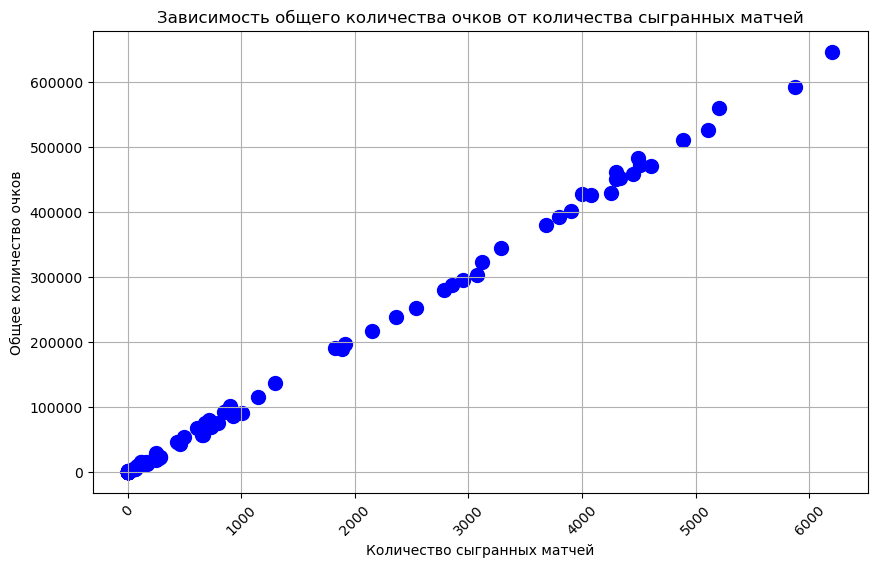

In [238]:
plt.figure(figsize=(10, 6))
plt.scatter(pts_stats_df['games_played'], pts_stats_df['total_pts'], color='blue', s=100)

plt.title('Зависимость общего количества очков от количества сыгранных матчей')
plt.xlabel('Количество сыгранных матчей')
plt.ylabel('Общее количество очков')
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [239]:
pts_stats_df['avg_pts_per_game'] = pts_stats_df['total_pts'] / pts_stats_df['games_played']
pts_stats_df.sort_values(by='avg_pts_per_game', ascending=False).head(20)

,team_name,games_played,total_pts,avg_pts_per_game
95,Team Giannis,5,851.0,170.200000
97,Team LeBron,10,1662.0,166.200000
96,Team Durant,3,460.0,153.333333
94,Team Stephen,2,290.0,145.000000
28,West NBA All Stars West,118,14998.0,127.101695
23,East NBA All Stars East,118,14993.0,127.059322
118,Adelaide 36ers,2,232.0,116.000000
34,San Diego Rockets,246,28403.0,115.459350
81,Milano Armani Jeans Milano,1,113.0,113.000000
27,Cincinnati Royals,902,101700.0,112.749446


Выводы:
1. Наибольшее среднее количество очков за матч наблюдается у команд, игравших наименьшее количество матчей, они же приглашённые команды, что свидетельствует о примерно равном распределнии сил среди команд нба 
2. Из основных команд нба самое большое среднее по матчам у команды Rockets, затем идут Royals и Warriors
3. Среднее количество набраных командой за матч очков 97,5

<h3> 2.4 Расчёт зависимости между средним ростом команды и количеством её побед </h3>

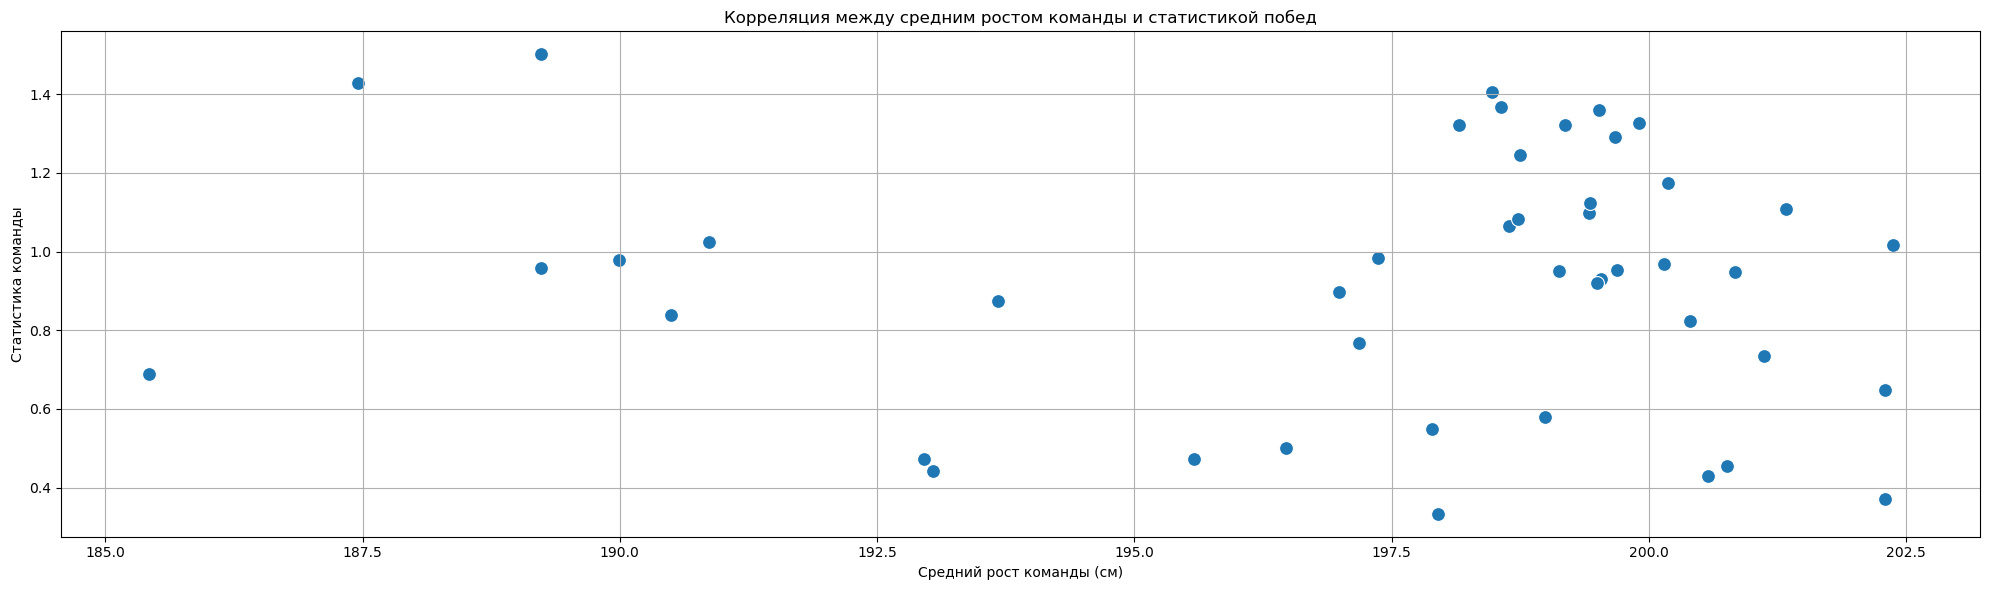

In [240]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=average_height_by_team['average_height'], y=stats['wins']/stats['losses'], s=100)
plt.xlabel('Средний рост команды (см)')
plt.ylabel('Статистика команды')
plt.title('Корреляция между средним ростом команды и статистикой побед')
plt.grid()
plt.tight_layout()
plt.show()

Вывод:
1. Количество побед слабо положительно зависит от среднего роста команды 

<h1> Статистика по командам </h1>

<h3> 3.1 Считывание данных </h3>

In [241]:
team = pd.read_csv(r'C:\Users\User\PycharmProjects\курсач исходники\team_history.csv')
team

,team_id,city,nickname,year_founded,year_active_till
0,1610612737,Atlanta,Hawks,1968,2019
1,1610612737,St. Louis,Hawks,1955,1967
2,1610612737,Milwaukee,Hawks,1951,1954
3,1610612737,Tri-Cities,Blackhawks,1949,1950
4,1610612741,Chicago,Bulls,1966,2019
5,1610612742,Dallas,Mavericks,1980,2019
6,1610612743,Denver,Nuggets,1976,2019
7,1610612744,Golden State,Warriors,1971,2019
8,1610612744,San Francisco,Warriors,1962,1970
9,1610612744,Philadelphia,Warriors,1946,1961


<h3> 3.2 Анализ продолжительности существования команд </h3>

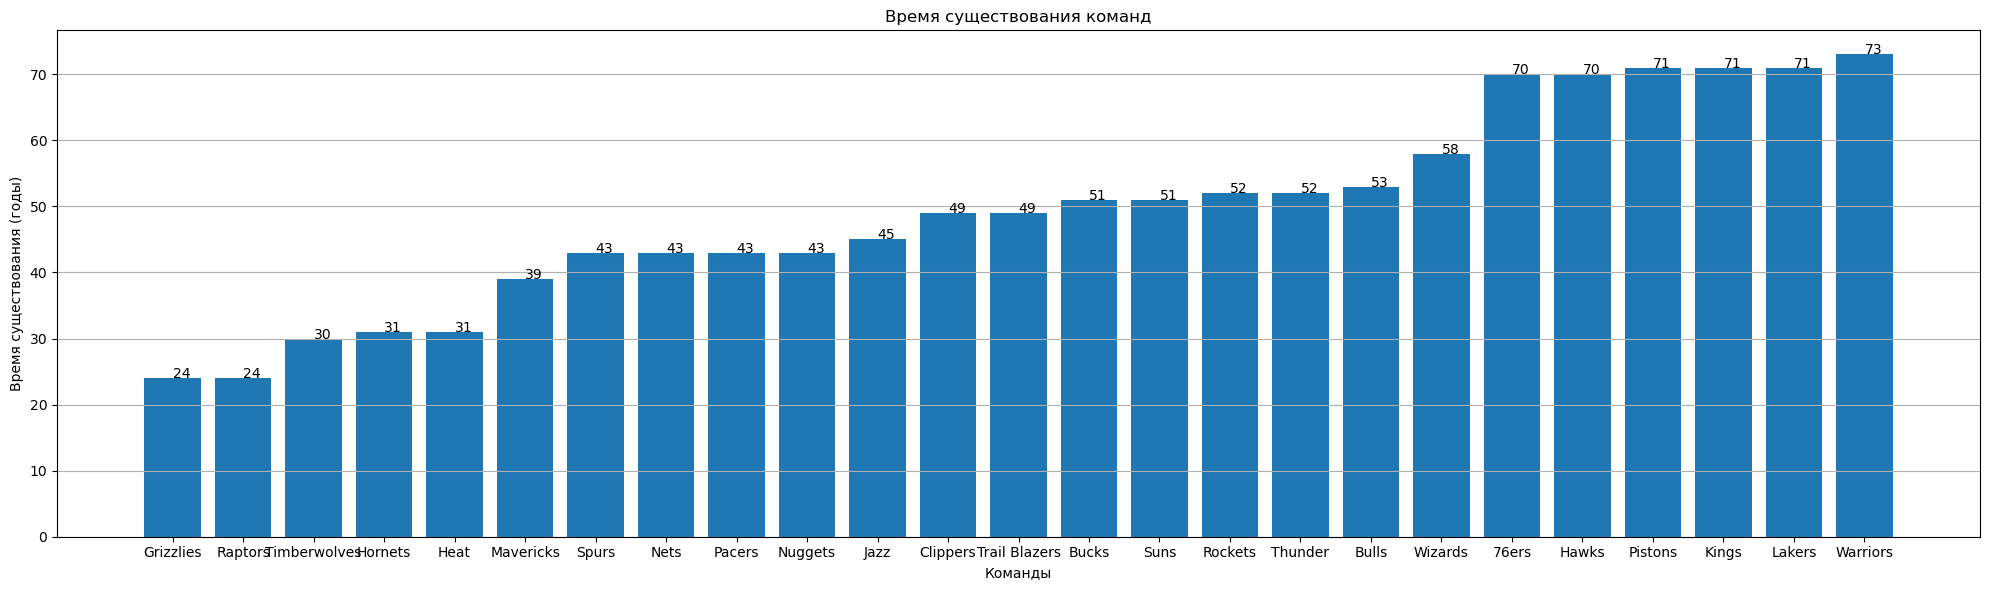

In [242]:
team_stats = team.groupby('team_id').agg({
    'nickname': 'first',
    'year_founded': 'min',
    'year_active_till': 'max'
}).reset_index()
team_stats['duration'] = team_stats['year_active_till'] - team_stats['year_founded']
team_stats = team_stats.sort_values(by='duration', ascending=True)

plt.figure(figsize=(20, 6))
plt.bar(team_stats['nickname'], team_stats['duration'])
plt.xlabel('Команды')
plt.ylabel('Время существования (годы)')
plt.title('Время существования команд')
for index, value in enumerate(team_stats['duration']):
    plt.text(index, value, str(value))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Выводы:
1. Средняя продолжительность существования команд - 49,5 лет 
2. Интересно, что команды, просуществовавшие одинаковое время, создавались и распускались в одни и те же годы (кроме Rocket и Thunder, 76ers и Hawks, Kings с Pistons и Lakers, то есть всего три исключения). Возможно, при более глубоком изучении общей обстановки было бы возможно выявить неочевидные причины этой закономерности. 

<h1> Подробная статистика по действиям команды во время матчей </h1>

<h3> 4.1 Считывание и очистка данных </h3> 

In [243]:
other_stats = pd.read_csv(r'C:\Users\User\PycharmProjects\курсач исходники\other_stats.csv')
other_stats.head(20)

,game_id,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,29600012,0,1610612756,PHX,Phoenix,44,18,2,1,4,1,0.0,12.0,11.0,NaN,1610612747,LAL,Los Angeles,42,10,13,19,0.0,23.0,11.0,NaN
1,29600005,0,1610612737,ATL,Atlanta,32,9,6,0,0,0,1.0,24.0,7.0,NaN,1610612748,MIA,Miami,32,15,14,16,1.0,19.0,6.0,NaN
2,29600002,0,1610612739,CLE,Cleveland,36,14,6,20,1,1,0.0,15.0,5.0,NaN,1610612751,NJN,New Jersey,26,16,4,2,1.0,22.0,12.0,NaN
3,29600007,0,1610612754,IND,Indiana,34,11,4,10,7,4,0.0,18.0,8.0,NaN,1610612765,DET,Detroit,30,14,7,9,2.0,19.0,10.0,NaN
4,29600013,0,1610612746,LAC,Los Angeles,40,19,2,12,5,4,0.0,20.0,7.0,NaN,1610612744,GSW,Golden State,30,9,2,6,0.0,20.0,7.0,NaN
5,29600009,0,1610612745,HOU,Houston,44,16,20,25,8,3,2.0,23.0,14.0,NaN,1610612758,SAC,Sacramento,38,9,12,2,0.0,27.0,11.0,NaN
6,29600014,0,1610612757,POR,Portland,62,24,19,35,3,3,0.0,17.0,11.0,NaN,1610612763,VAN,Vancouver,34,8,6,2,1.0,16.0,9.0,NaN
7,29600001,0,1610612738,BOS,Boston,48,18,15,16,8,5,0.0,18.0,11.0,NaN,1610612741,CHI,Chicago,56,12,15,11,0.0,19.0,13.0,NaN
8,29600006,0,1610612761,TOR,Toronto,28,11,14,7,16,7,0.0,24.0,12.0,NaN,1610612752,NYK,New York,38,10,15,11,0.0,24.0,13.0,NaN
9,29600003,0,1610612749,MIL,Milwaukee,46,27,9,14,4,5,1.0,15.0,14.0,NaN,1610612755,PHI,Philadelphia,54,8,24,2,1.0,14.0,10.0,NaN


In [244]:
del other_stats['game_id']
del other_stats['league_id']
del other_stats['team_id_home']
del other_stats['team_city_home']
del other_stats['pts_off_to_home']
del other_stats['team_id_away']
del other_stats['team_city_away']
del other_stats['pts_off_to_away']
other_stats.head(20)

,team_abbreviation_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,team_abbreviation_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away
0,PHX,44,18,2,1,4,1,0.0,12.0,11.0,LAL,42,10,13,19,0.0,23.0,11.0
1,ATL,32,9,6,0,0,0,1.0,24.0,7.0,MIA,32,15,14,16,1.0,19.0,6.0
2,CLE,36,14,6,20,1,1,0.0,15.0,5.0,NJN,26,16,4,2,1.0,22.0,12.0
3,IND,34,11,4,10,7,4,0.0,18.0,8.0,DET,30,14,7,9,2.0,19.0,10.0
4,LAC,40,19,2,12,5,4,0.0,20.0,7.0,GSW,30,9,2,6,0.0,20.0,7.0
5,HOU,44,16,20,25,8,3,2.0,23.0,14.0,SAC,38,9,12,2,0.0,27.0,11.0
6,POR,62,24,19,35,3,3,0.0,17.0,11.0,VAN,34,8,6,2,1.0,16.0,9.0
7,BOS,48,18,15,16,8,5,0.0,18.0,11.0,CHI,56,12,15,11,0.0,19.0,13.0
8,TOR,28,11,14,7,16,7,0.0,24.0,12.0,NYK,38,10,15,11,0.0,24.0,13.0
9,MIL,46,27,9,14,4,5,1.0,15.0,14.0,PHI,54,8,24,2,1.0,14.0,10.0


<h3> 4.2 Анализ соотношения методов зарабатывания очков </h3>

In [277]:
teams = pd.concat([other_stats['team_abbreviation_home'], other_stats['team_abbreviation_away']]).unique()

detail_stats = {team: {'pts_paint': 0, 'pts_2nd_chance': 0, 'pts_fb': 0} for team in teams}
for index, row in other_stats.iterrows():
    detail_stats[row['team_abbreviation_home']]['pts_paint'] += row['pts_paint_home'] 
    detail_stats[row['team_abbreviation_home']]['pts_2nd_chance'] += row['pts_2nd_chance_home']
    detail_stats[row['team_abbreviation_home']]['pts_fb'] += row['pts_fb_home'] 
    
    detail_stats[row['team_abbreviation_away']]['pts_paint'] += row['pts_paint_away']
    detail_stats[row['team_abbreviation_away']]['pts_2nd_chance'] += row['pts_2nd_chance_away']
    detail_stats[row['team_abbreviation_away']]['pts_fb'] += row['pts_fb_away']

detail_stats_df1 = pd.DataFrame.from_dict(detail_stats, orient='index').reset_index()
detail_stats_df1.columns = ['team', 'pts_paint', 'pts_2nd_chance', 'pts_fb']
display(detail_stats_df1)

,team,pts_paint,pts_2nd_chance,pts_fb
0,PHX,84494,25071,29032
1,ATL,78724,25199,24226
2,CLE,79580,25703,23512
3,IND,74974,24297,23573
4,LAC,79850,25103,22940
5,HOU,79916,25821,23879
6,POR,75264,25868,20684
7,BOS,79368,24680,24750
8,TOR,75568,25264,26279
9,MIL,79656,24627,25756


In [278]:
teams = pd.concat([game['team_abbreviation_home'], game['team_abbreviation_away']]).unique()

detail_stats2 = {team: {'fgm': 0, 'ftm': 0} for team in teams}

for index, row in game.iterrows():
    detail_stats2[row['team_abbreviation_home']]['fgm'] += row['fgm_home']
    detail_stats2[row['team_abbreviation_home']]['ftm'] += row['ftm_home']
    
    detail_stats2[row['team_abbreviation_away']]['fgm'] += row['fgm_away']
    detail_stats2[row['team_abbreviation_away']]['ftm'] += row['ftm_away']

detail_stats_df2 = pd.DataFrame.from_dict(detail_stats2, orient='index').reset_index()
detail_stats_df2.columns = ['team', 'fgm', 'ftm']
display(detail_stats_df2)

,team,fgm,ftm
0,HUS,1513.0,965.0
1,BOM,6589.0,4618.0
2,PRO,4589.0,3055.0
3,CHS,7650.0,4710.0
4,DEF,1437.0,923.0
5,CLR,1760.0,954.0
6,PIT,1346.0,982.0
7,BOS,246491.0,130796.0
8,PHW,33210.0,24507.0
9,NYK,225350.0,121030.0


In [280]:
merged = pd.merge(detail_stats_df1, detail_stats_df2, on='team')
merged

,team,pts_paint,pts_2nd_chance,pts_fb,fgm,ftm
0,PHX,84494,25071,29032,185183.0,91384.0
1,ATL,78724,25199,24226,173774.0,90069.0
2,CLE,79580,25703,23512,164295.0,80970.0
3,IND,74974,24297,23573,151453.0,77724.0
4,LAC,79850,25103,22940,125120.0,63001.0
5,HOU,79916,25821,23879,171035.0,84432.0
6,POR,75264,25868,20684,171429.0,86148.0
7,BOS,79368,24680,24750,246491.0,130796.0
8,TOR,75568,25264,26279,88334.0,43263.0
9,MIL,79656,24627,25756,181821.0,86931.0


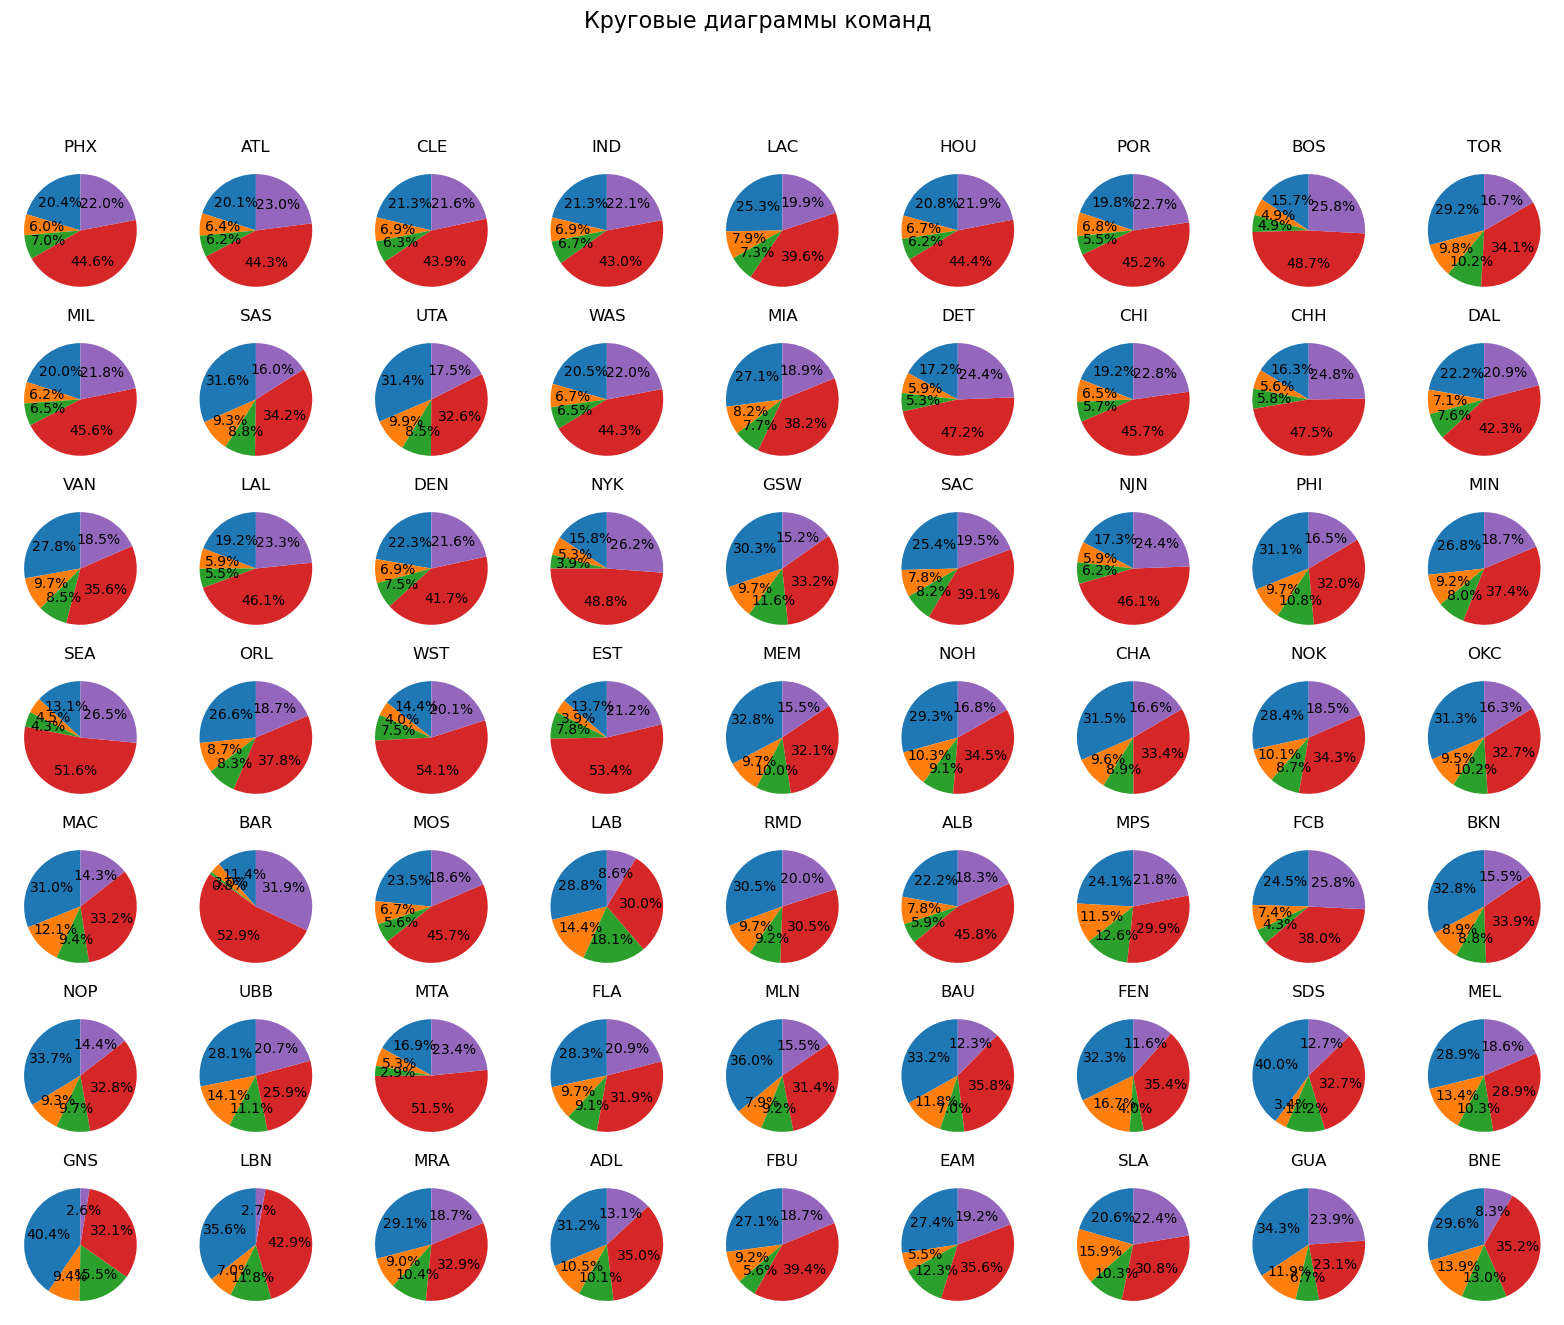

In [291]:
fig, axes = plt.subplots(nrows=7, ncols=9, figsize=(20, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    row = merged.iloc[i]
    values = row[1:]
    labels = values.index
    ax.pie(values, autopct='%1.1f%%', startangle=90)
    ax.set_title(row['team'])
plt.suptitle('Круговые диаграммы команд', fontsize=16)
plt.show()

Легенда: 
- синий - очки у кольца
- оранжевый - очки с подбора
- зеленый - очки с фастбрейка
- красный - двухочковые
- фиолетовый - трехочковые

Выводы:

1. Чаще всего бОльшую часть очков команда набирает с помощью двухочковых бросков, второе по попуярности - очки из-под кольца
2. Количество очков с подбора составляет в среднем 7,3% от общего значения, набранного командой
3. Количество очков с фастбрейка составляет в среднем 8% от общего значения, набранного командой 